In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

plt.style.use(style='ggplot')
np.random.seed(1234)
random.seed(1234)

In [56]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [57]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [60]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [61]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [62]:
all_df = pd.concat([train_df, test_df], axis=0, sort=False).reset_index(drop=True)

In [63]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [64]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [65]:
all_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [66]:

from sklearn.preprocessing import LabelEncoder

categories = all_df.columns[all_df.dtypes == "object"]
print(categories)
print(len(categories))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [67]:
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [68]:
for cat in categories:
    le = LabelEncoder()
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

In [69]:
all_df.isnull().sum()[all_df.isnull().sum() != 0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [70]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [71]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [74]:
import lightgbm as lgb

In [73]:
from sklearn.model_selection import KFold

folds = 3
kf = KFold(n_splits=folds)

In [75]:
lgbm_params = {"objective": "regression", "random_seed": 1234}

In [76]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]

In [77]:
train_X.isna().sum()[train_X.isna().sum() != 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [78]:
train_Y.isna().sum()

0

In [200]:
from sklearn.metrics import mean_squared_error

In [205]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [86]:
actual_pred_df = pd.DataFrame({"actual": train_Y, "pred": oof})

<Axes: >

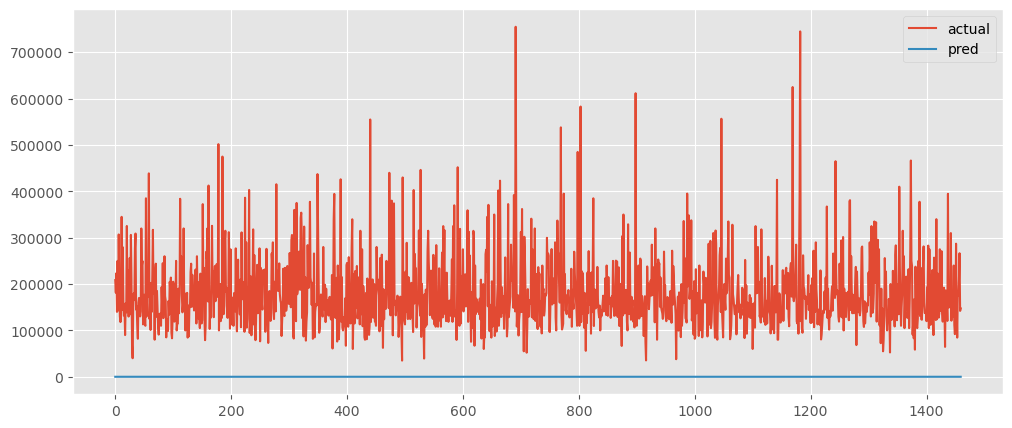

In [87]:

actual_pred_df.plot(figsize=(12, 5))

In [88]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [203]:

result = models[0].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = result
submission.to_csv("./submit/submission00.csv", index=False)

IndexError: list index out of range

In [90]:

train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

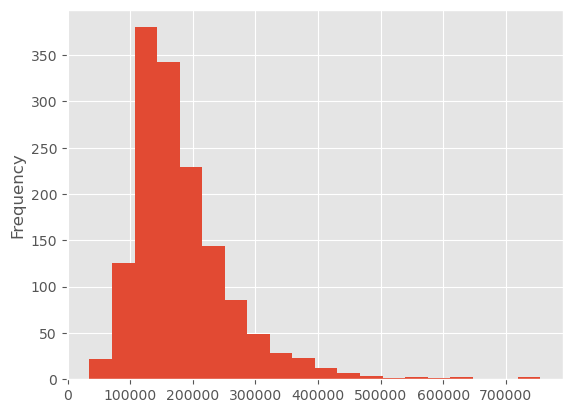

In [91]:

train_df["SalePrice"].plot.hist(bins=20)

In [92]:
np.log(train_df["SalePrice"])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

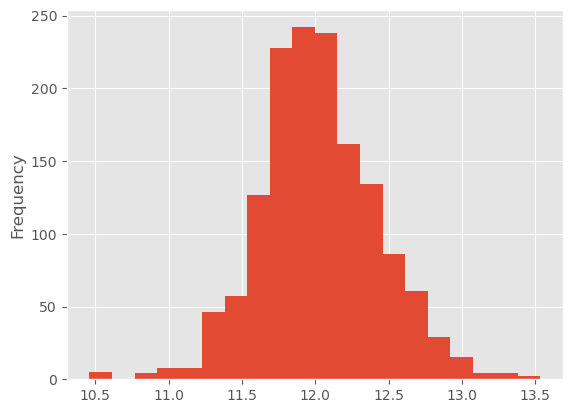

In [93]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [94]:
pd.options.mode.chained_assignment = None
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

In [95]:
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [96]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [97]:
train_Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_log, Length: 1460, dtype: float64

In [161]:
import warnings

warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [204]:
result = models[0].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = np.exp(result)
submission.to_csv("./submit/submission01.csv", index=False)

IndexError: list index out of range

In [101]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

all_df = pd.concat([train_df, test_df], axis=0, sort=False).reset_index(drop=True)

categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [102]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [103]:
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [104]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [105]:
all_df["PoolQC"].value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [106]:
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0

In [107]:
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0

In [108]:
all_df["hasHightFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [109]:
all_df["hasHightFacility"] = all_df["hasHightFacility"].astype(int)

In [110]:
all_df["hasHightFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHightFacility, dtype: int64

In [111]:

all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

In [112]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [114]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [115]:
nonration_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt",
                      "YearRemodAdd", "MoSold", "YrSold"]

In [116]:
num_features = sorted(list(set(train_df_num) - set(nonration_features)))

In [117]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [119]:
train_df_num_rs = train_df_num[num_features]

In [120]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] ==0:
        print(col, len(train_df_num_rs[train_df_num_rs[col]==0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [122]:
for col in num_features:
    if train_df_num_rs[col].nunique() <15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [123]:
for col in num_features:
    tmp_df= train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() +
    train_df_num_rs[col].std() *3 )| \
    (train_df_num_rs[col] < train_df_num_rs[col].mean() -
    train_df_num_rs[col].std() *3 )]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

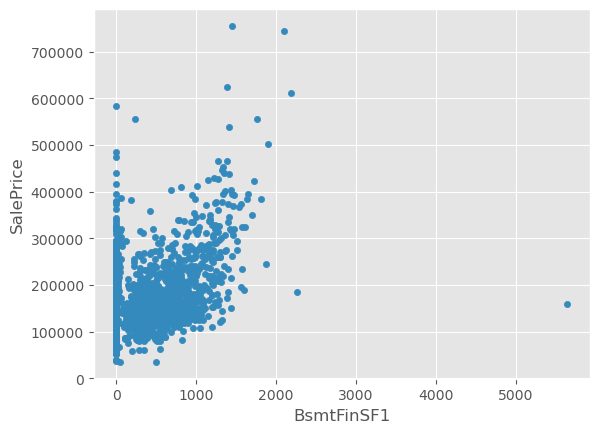

In [124]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [125]:
all_df[all_df["TotalBsmtSF"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

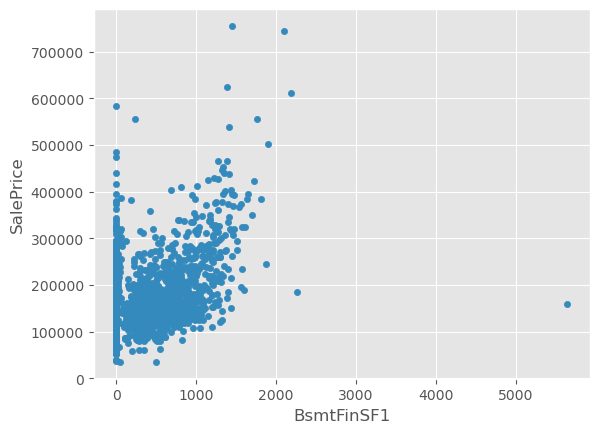

In [126]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [127]:
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

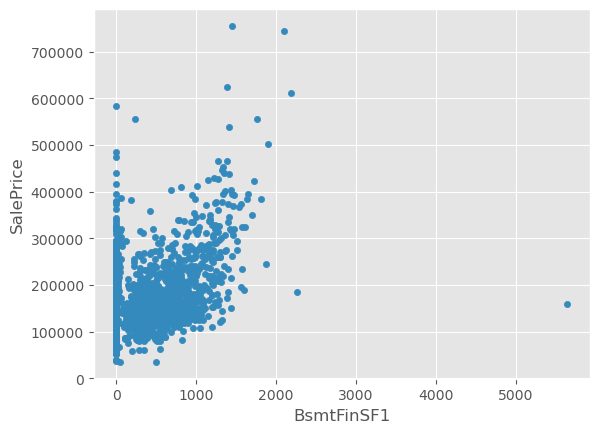

In [128]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [129]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

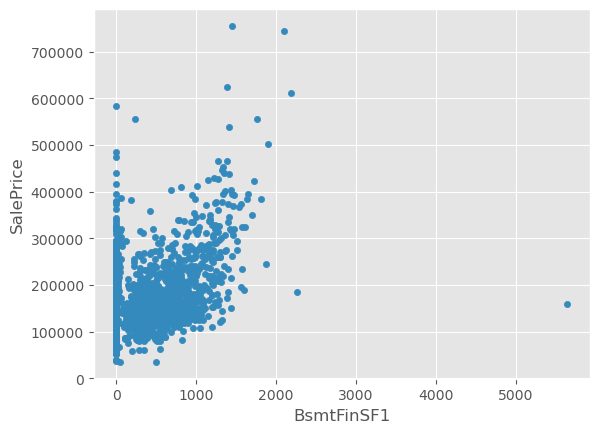

In [130]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [132]:
all_df[all_df["1stFlrSF"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [143]:
all_df = all_df[(all_df['BsmtFinSF1'] < 2000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['TotalBsmtSF'] < 3000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['GrLivArea'] < 4500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['1stFlrSF'] < 2500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['LotArea'] < 10000) | (all_df['SalePrice'].isnull())]

In [144]:
categories = categories.drop(["PoolQC", "MiscFeature","Alley"])

In [145]:
for cat in categories:
    le= LabelEncoder()
    print(cat)
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [159]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [160]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred  

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [171]:
sum(rmses)/len(rmses)

ZeroDivisionError: division by zero

In [172]:
all_df[["YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearRemodAdd,GarageYrBlt,YrSold
count,2295.000000,2150.000000,2295.000000
mean,1983.442702,1977.384186,2007.800871
std,21.271568,26.175435,1.309545
min,1950.000000,1895.000000,2006.000000
25%,1963.000000,1959.000000,2007.000000
50%,1992.000000,1979.000000,2008.000000
75%,2003.000000,2002.000000,2009.000000
max,2010.000000,2207.000000,2010.000000


In [173]:
all_df["Age"] = all_df["YrSold"] = all_df["YearBuilt"]

In [174]:
(...생략: 코드 4-56의 반복...)

SyntaxError: invalid decimal literal (3087826162.py, line 1)

In [175]:
sum(rmses)/len(rmses)

ZeroDivisionError: division by zero

In [176]:
all_df[
    [
        "LotArea",
        "MasVnrArea",
        "BsmtUnfSF",
        "1stFlrSF",
        "2ndFlrSF",
        "LowQualFinSF",
        "GrLivArea",
        "GarageArea",
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
        "PoolArea",
        "LotFrontage",
    ]
].describe()

,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2295.000000,2276.000000,2294.000000,2295.000000,2295.00000,2295.000000,2295.000000,2294.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,1950.000000
mean,8889.566449,90.452109,545.081953,1112.132462,315.40610,4.154248,1431.692810,450.726678,86.973856,44.905882,24.190850,1.781699,14.704575,1.359913,65.688718
std,4346.447797,167.087651,423.944232,367.247419,408.65849,44.022550,462.137246,211.210886,121.853336,65.620297,64.978993,19.190070,52.125576,27.122480,21.007830
min,1300.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7000.000000,0.000000,216.000000,858.500000,0.00000,0.000000,1092.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
50%,8688.000000,0.000000,460.000000,1043.000000,0.00000,0.000000,1374.000000,460.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,65.000000
75%,10167.000000,142.000000,785.000000,1326.500000,672.00000,0.000000,1668.000000,572.000000,159.000000,65.000000,0.000000,0.000000,0.000000,0.000000,76.000000
max,56600.000000,1600.000000,2140.000000,5095.000000,1862.00000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,200.000000


In [177]:
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
all_df["Total_bathrooms"] = (
    all_df["FullBath"]
    + all_df["HalfBath"]
    + all_df["BsmtFullBath"]
    + all_df["BsmtHalfBath"]
)

In [178]:
all_df["Total_PorchSF"] = (
    all_df["OpenPorchSF"]
    + all_df["3SsnPorch"]
    + all_df["EnclosedPorch"]
    + all_df["ScreenPorch"]
    + all_df["WoodDeckSF"]
)

In [179]:
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop(["Total_PorchSF"], axis=1)

In [180]:

train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [181]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [182]:
result = models[2].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = np.exp(result)
submission.to_csv("./submit/submission04.csv", index=False)

IndexError: list index out of range

In [183]:

import optuna

ModuleNotFoundError: No module named 'optuna'

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    train_X, train_Y, test_size=0.2, random_state=1234, shuffle=True, stratify=None
)

In [185]:
def objective(trial):
    params = {
        "objective": "regression",
        "random_seed": 1234,
        "learning_rate": 0.1,
        "n_estimators": 100,
        "num_leaves": trial.suggest_int("num_leaves", 4, 64),
        "max_bin": trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction": trial.suggest_discrete_uniform(
            "bagging_fraction", 0.4, 0.9, 0.1
        ),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction": trial.suggest_discrete_uniform(
            "feature_fraction", 0.4, 0.9, 0.1
        ),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf": trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
    }

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [186]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

NameError: name 'optuna' is not defined

In [187]:
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    "learning_rate": 0.05,
    "n_estimators": 1000,
    "num_leaves": 29,
    "bagging_fraction": 0.8,
    "bagging_freq": 7,
    "feature_fraction": 0.5,
    "max_bin": 82,
    "min_data_in_leaf": 4,
    "min_sum_hessian_in_leaf": 5,
}

In [188]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [189]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [190]:
sum(rmses) / len(rmses)

ZeroDivisionError: division by zero

In [191]:

test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [192]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [193]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [194]:
preds_exp = np.exp(preds_mean)

In [195]:
len(preds_exp)

TypeError: object of type 'numpy.float64' has no len()

In [196]:
submission["SalePrice"] = preds_exp

In [197]:
submission.to_csv("./submit/submission05.csv", index=False)